In [7]:
from importlib import reload
from src.GEFConstructor import CreateGEF

import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Comparison Run
GEFComp = CreateGEF("Config/ClassicGEF+beta25+Mass.py")
GEFComp.Unitless()
tfin = GEFComp.vals["t"][-1]
ntr = 225
tmid = 100
GEF1 = CreateGEF("Config/ClassicGEF+beta25+Mass-Test.py")
sol = GEF1.RunGEF(ntr, tend=tmid, restart=False)




I am here
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
Elapsed time: 375.8838 seconds
success: True


In [11]:
print(sol.y.shape)

(682, 1001)


In [ ]:

GEF2 = CreateGEF("Config/ClassicGEF+beta25+Mass-Test.py")
GEF2.vals = GEF1.vals.copy()
GEF2["N"] = sol.y[0,-1]
GEF2["phi"] = sol.y[1,-1]
GEF2["N"] = sol.y[0,-1]
GEF2["N"] = sol.y[0,-1]
GEF2["N"] = sol.y[0,-1]

GEF2.RunGEF(ntr, tend=tfin, restart=True)

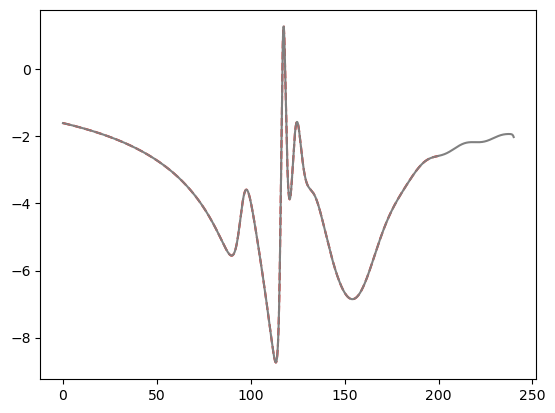

In [6]:
plt.plot(GEF1.vals["t"], GEF1.vals["xi"], "r--")
plt.plot(GEF2.vals["t"], GEF2.vals["xi"], "b--")
plt.plot(GEFComp.vals["t"], GEFComp.vals["xi"], "gray")

Already Unitful


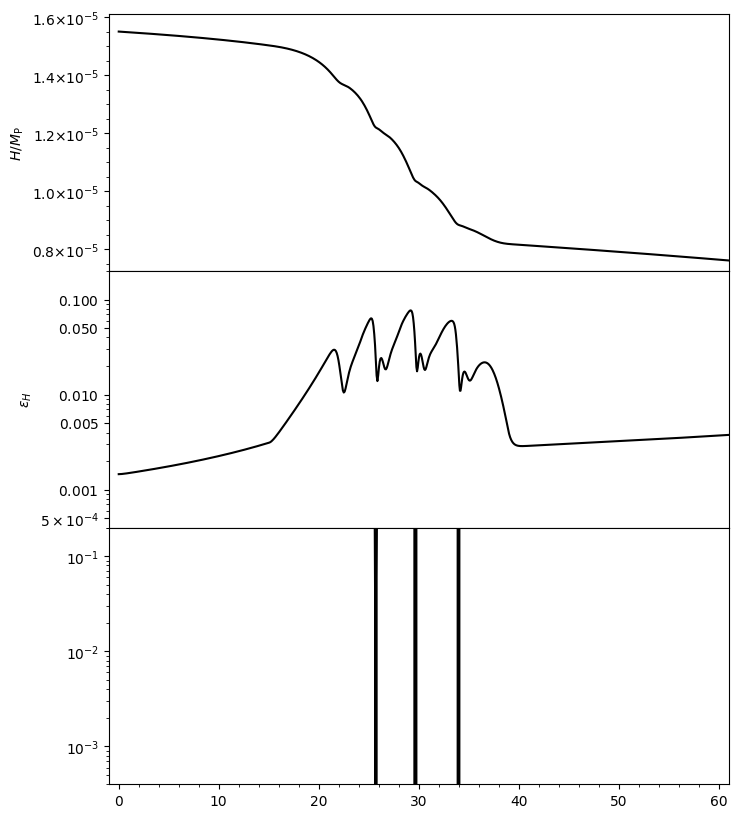

In [ ]:
G.Unitful()

epsH = -G.vals["Hprime"]/G.vals["H"]**2

fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,10))
ax[0].plot(G.vals["N"], G.vals["H"], "k")
ax[0].set_ylim(0.725e-5,1.61e-5)
yticks = np.round(np.arange(0.8, 1.61, 0.2),1)
ytickslab = [rf"${ytick}$" + r"$\times 10^{-5}$" for ytick in yticks]
ax[0].set_yticks(yticks*1e-5, ytickslab)
yticksmin = np.arange(0.75, 1.65, 0.05)
ax[0].set_yticks(yticksmin*1e-5, minor=True)
ax[0].set_ylabel(r"$H/M_{\rm P}$")

ax[1].plot(G.vals["N"], epsH, "k")
yticks = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
ytickslab = [r"$5 \times 10^{-4}$", r"$0.001$", r"$0.005$", r"$0.010$", r"$0.050$", r"$0.100$"]

ax[1].set_ylim(4e-4,0.2)
ax[1].set_yscale("log")
ax[1].set_yticks(yticks, ytickslab)
ax[1].set_ylabel(r"$\varepsilon_H$")

ax[2].plot(G.vals["N"], G.vals["xi"], "k")
ax[2].set_ylim(4e-4,0.2)
ax[2].set_yscale("log")

ax[2].set_xticks(np.arange(0, 70, 10))
ax[2].set_xticks(np.arange(0, 70, 2), minor=True)
ax[2].set_xlim(-1, 61)
plt.subplots_adjust(hspace=0)
plt.show()